# Images
This notebook shows usage for the Image type.  This type is useful for loading single image files, reading the embedded metadata, and performing radiometric calibrations.

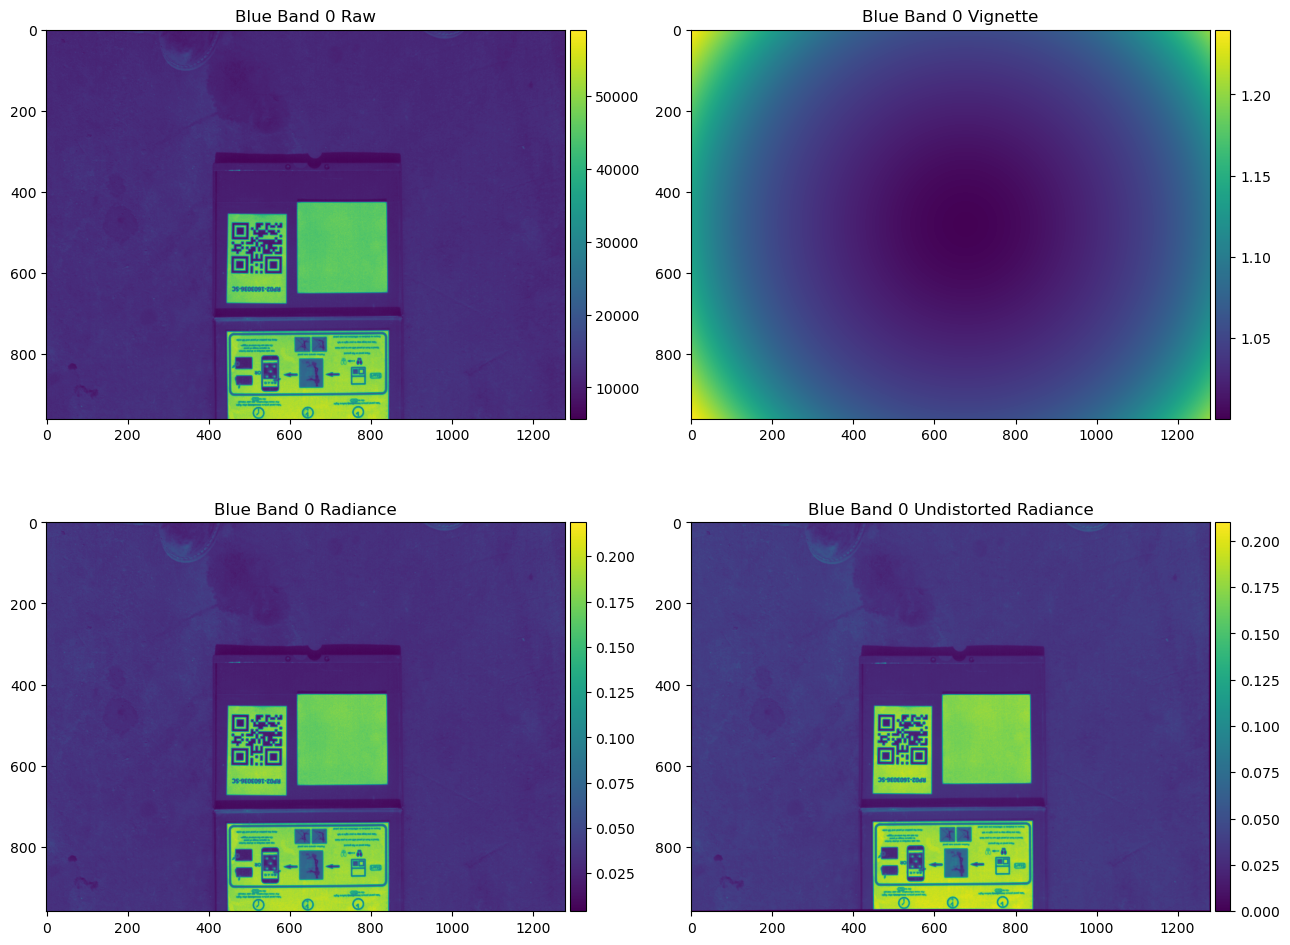

In [3]:
from micasense.image import Image
import os, glob
%matplotlib inline

imagePath = os.path.join('.','data','0000SET','000')
imageName = glob.glob(os.path.join(imagePath,'IMG_0000_1.tif'))[0]

img = Image(imageName)
img.plot_all()

# Image Histogram

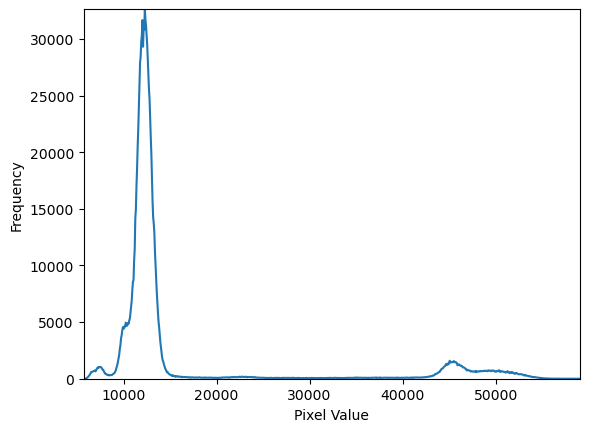

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

nbins = 1024
vmin = 0
vmax = 2**16
bins = range(vmin,vmax, int(vmax/nbins))
hist = cv2.calcHist([img.raw().ravel()],[0],None,[nbins],[vmin,vmax])
plt.plot(bins,hist)
plt.xlim(img.raw().min(),img.raw().max())
plt.ylim(0,hist.max())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Captures

Once you've mastered images, move on to groups of images, or [Captures](Captures.html)

---
Copyright (c) 2017-2019 MicaSense, Inc.  For licensing information see the [project git repository](https://github.com/micasense/imageprocessing)